In [1]:
import os
import gzip
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
import datetime
import time
    



def obtaindateliteral(yday,year):

    if(year<10):
        string=str(yday)+","+"0"+str(year)
    else:
        string=str(yday)+","+str(year)
    time_1 = time.strptime(string,"%j,%y")
  #time_string = time.strftime("%m/%d/%Y, %H:%M:%S", named_tuple)
    return (time_1.tm_year,time.strftime("%B",time_1),time_1.tm_mon)


    
def agregaarchivo(data_file,df_marks):
    
    # Delimiter
    data_file_delimiter ='\s+'
    
    # The max column count a line in the file could have
    largest_column_count = 0

    # Loop the data lines
    with open(data_file, 'r') as temp_f:
        # Read the lines
        lines = temp_f.readlines()

        for l in lines:
            # Count the column count for the current line
            column_count = len(l.split())+ 1

            # Set the new most column count
            largest_column_count = column_count if largest_column_count < column_count else largest_column_count

    # Close file
    temp_f.close()

    # Generate column names (will be 0, 1, 2, ..., largest_column_count - 1)
    column_names = [i for i in range(0, largest_column_count)]

    # Read csv
    df = pd.read_csv(data_file, header=None, delim_whitespace=True, names=column_names)
    # print(df)

    row=df.shape[0]
    column=df.shape[1]
    #print(row)
    #print(column)


    Satélite=0
    S4=0
    for y in range(0, df.shape[0]):
        if df[0][y]<2000:
            Año=df[0][y]
            Day=df[1][y]
            Tiempo=df[2][y]
            Nsats=df[3][y]
            for x in range(0,df.shape[1]):
                if (x-4)%4==0 and ((Nsats+1)*4)> x > 3:
                    #print("x:",x)
                    #print("Satélite:",df[x][y])
                    Satélite=df[x][y]

                if (x-5) % 4==0 and ((Nsats+1)*4)>x>4:
                    #print("S4:",df[x][y])
                    S4=df[x][y]

                if (x-6) % 4==0 and ((Nsats+1)*4)>x>5:
                    #print("Az:",df[x][y])
                    Az=df[x][y]

                if (x-7) % 4==0 and ((Nsats+1)*4)>x>6:
                    #print("Elv:",df[x][y])
                    Elv=df[x][y]



                    new_row = { 'Año':Año,'Day':Day,'Tiempo':Tiempo,'PRN':Satélite, 'S4':S4,'Az':Az,'Elv':Elv}
                    #append row to the dataframe
                    df_marks = df_marks.append(new_row, ignore_index=True)

    return df_marks

 

def devolverArchivos(carpeta):

    count=0

    for archivo in os.listdir(carpeta):

            count=count+1
            with gzip.open(os.path.join(carpeta,archivo), 'rb') as f_in:
                with open('/home/gfajardo/Desktop/Datos 121001/lji-Summer-08&09 Huancayo.s4', 'wb') as f_out:
                    shutil.copyfileobj(f_in, f_out)
 

            # Input
            data_file='/home/gfajardo/Desktop/Datos 121001/lji-Summer-08&09 Huancayo.s4'
        
            if (count<2):
                        #Creating a new dataframe
                df_marks = pd.DataFrame(columns=['Año','Day','Tiempo','PRN','S4','Az','Elv'])        
                listaF=agregaarchivo(data_file,df_marks)
                print(os.path.join(carpeta,archivo))
                print(count)
            else:
                listaF=agregaarchivo(data_file,listaF)
                print(os.path.join(carpeta,archivo))
                print(count)

            if os.path.isdir(os.path.join(carpeta,archivo)):
                devolverArchivos(os.path.join(carpeta,archivo)) #parte recursiva, es decir para leer todas las subcarpetas
    
    return(listaF)          

            
Mli=devolverArchivos("/home/gfajardo/Desktop/Datos 121001/gfajardo_KrReiO/")
#devolverArchivos("/home/gfajardo/Desktop/Datos 121001/gfajardo_9sbmuc/")
print(Mli)
#devolverArchivos("/home/gfajardo/Desktop/Datos 121001/gfajardo_9sbmuc")
Mli.to_csv(r'/home/gfajardo/Desktop/Datos 121001/Summer-08&09 Huancayo.csv')

/home/gfajardo/Desktop/Datos 121001/gfajardo_KrReiO/lhyo_081213.s4.gz
1
/home/gfajardo/Desktop/Datos 121001/gfajardo_KrReiO/lhyo_081209.s4.gz
2
/home/gfajardo/Desktop/Datos 121001/gfajardo_KrReiO/lhyo_090206.s4.gz
3
/home/gfajardo/Desktop/Datos 121001/gfajardo_KrReiO/lhyo_090214.s4.gz
4
/home/gfajardo/Desktop/Datos 121001/gfajardo_KrReiO/lhyo_081204.s4.gz
5
/home/gfajardo/Desktop/Datos 121001/gfajardo_KrReiO/lhyo_090213.s4.gz
6
/home/gfajardo/Desktop/Datos 121001/gfajardo_KrReiO/lhyo_090216.s4.gz
7
/home/gfajardo/Desktop/Datos 121001/gfajardo_KrReiO/lhyo_090221.s4.gz
8
/home/gfajardo/Desktop/Datos 121001/gfajardo_KrReiO/lhyo_090127.s4.gz
9
/home/gfajardo/Desktop/Datos 121001/gfajardo_KrReiO/lhyo_090117.s4.gz
10
/home/gfajardo/Desktop/Datos 121001/gfajardo_KrReiO/lhyo_090211.s4.gz
11
/home/gfajardo/Desktop/Datos 121001/gfajardo_KrReiO/lhyo_090125.s4.gz
12
/home/gfajardo/Desktop/Datos 121001/gfajardo_KrReiO/lhyo_090227.s4.gz
13
/home/gfajardo/Desktop/Datos 121001/gfajardo_KrReiO/lhyo_090

In [58]:
import os
import gzip
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
import datetime
import time
data_file='/home/gfajardo/Desktop/151231_000000.psn'
#column_names=['Año','Day','Tiempo','PRN','S4','Az','Elv']
Mli = pd.read_csv(data_file, header=None)#names=column_names)#)
#Mli = pd.read_csv(data_file, header=None, delim_whitespace=True)
#Mli = Mli.drop(Mli.columns[[0]], axis=1)


    
# Delimiter
data_file_delimiter = '\s+'
    
# The max column count a line in the file could have
largest_column_count = 0

# Loop the data lines
with open(data_file, 'r') as temp_f:
        # Read the lines
        lines = temp_f.readlines()

        for l in lines:
            # Count the column count for the current line
            column_count = len(l.split())+ 1

            # Set the new most column count
            largest_column_count = column_count if largest_column_count < column_count else largest_column_count

# Close file
temp_f.close()

 # Generate column names (will be 0, 1, 2, ..., largest_column_count - 1)
column_names = [i for i in range(0, largest_column_count)]

# Read csv
Mli = pd.read_csv(data_file, header=None, delim_whitespace=True, names=column_names)
print(range(2,5))
print(len(Mli))
print(type(Mli))
Time=Mli[Mli[0] == "T"]
#print(Time.drop(Time[2],axis=1))
Time = Time.drop(Time.columns[range(5,largest_column_count)], axis=1)  # df.columns is zero-based pd.Index 
Time['index_col'] = Time.index
#print(Time)
onlypositions= Mli[Mli[0] != "T"]
onlypositions = onlypositions.drop(onlypositions.columns[range(3,largest_column_count)], axis=1)  # df.columns is zero-based pd.Index 
#print(onlypositions)

print(Mli)
print(onlypositions)



range(2, 5)
3660
<class 'pandas.core.frame.DataFrame'>
               0          1         2   3      4    5    6    7    8    9   \
0     -12.0424169 -75.321412  3321.017   9    22U  03U  32U  16U  14U  08U   
1     -12.0424169 -75.321412  3320.980   9    22U  03U  32U  16U  14U  08U   
2     -12.0424168 -75.321412  3320.957   9    22U  03U  32U  16U  14U  08U   
3     -12.0424169 -75.321412  3320.896   9    22U  03U  32U  16U  14U  08U   
4               T  15.000000    12.000  30  86272  NaN  NaN  NaN  NaN  NaN   
5     -12.0424170 -75.321413  3320.875   9    22U  03U  32U  16U  14U  08U   
6     -12.0424170 -75.321412  3320.917   9    22U  03U  32U  16U  14U  08U   
7     -12.0424171 -75.321412  3320.919   9    22U  03U  32U  16U  14U  08U   
8     -12.0424170 -75.321412  3320.911   9    22U  03U  32U  16U  14U  08U   
9     -12.0424171 -75.321412  3320.944   9    22U  03U  32U  16U  14U  08U   
10    -12.0424170 -75.321412  3320.979   9    22U  03U  32U  16U  14U  08U   
11    -12

In [25]:

a=[] 
y=0
dia=[]
w=[]
df_marks = pd.DataFrame(columns=['Dia','Seg']) 
for i in Time.index:
    x=i+1
    z=x-y
    for j in range (0,z-1):
        
        n=int(Time[4][i])+j 
        m=int(Time[3][i])
        if n> 86399: 
            dia+=[m+1]
            a+=[n-86400]
            w+=[m+1,n-86400]
            new_row = { 'Dia':m+1,'Seg':n-86400}
            #append row to the dataframe
            df_marks = df_marks.append(new_row, ignore_index=True)
        else:
            dia+=[m]
            a+=[n]
            w+=[m,n]
            new_row = { 'Dia':m,'Seg':n}
            #append row to the dataframe
            df_marks = df_marks.append(new_row, ignore_index=True)
        #print(j)
    y=i 

print(df_marks) 

     Dia    Seg
0     30  86272
1     30  86273
2     30  86274
3     30  86275
4     30  86332
5     30  86333
6     30  86334
7     30  86335
8     30  86336
9     30  86337
10    30  86338
11    30  86339
12    30  86340
13    30  86341
14    30  86342
15    30  86343
16    30  86344
17    30  86345
18    30  86346
19    30  86347
20    30  86348
21    30  86349
22    30  86350
23    30  86351
24    30  86352
25    30  86353
26    30  86354
27    30  86355
28    30  86356
29    30  86357
...   ..    ...
3573  31   3443
3574  31   3444
3575  31   3445
3576  31   3446
3577  31   3447
3578  31   3448
3579  31   3449
3580  31   3450
3581  31   3451
3582  31   3452
3583  31   3453
3584  31   3454
3585  31   3455
3586  31   3456
3587  31   3457
3588  31   3458
3589  31   3459
3590  31   3460
3591  31   3461
3592  31   3462
3593  31   3463
3594  31   3464
3595  31   3465
3596  31   3466
3597  31   3467
3598  31   3468
3599  31   3469
3600  31   3470
3601  31   3471
3602  31   3472

[3603 r

In [38]:
a=[] 
y=0
dia=[]
w=[]
df_marks = pd.DataFrame(columns=['Dia','Seg']) 
for i in Time.index:
    x=i+1
    z=x-y-1
    for j in range (0,z-1):
        
        n=int(Time[4][i])-((z-1)-j)
        print((z-1)-j)
        m=int(Time[3][i])
        if n> 86399: 
            dia+=[m+1]
            a+=[n-86400]

            new_row = { 'Dia':m+1,'Seg':n-86400}
            #append row to the dataframe
            df_marks = df_marks.append(new_row, ignore_index=True)
        else:
            dia+=[m]
            a+=[n]
            w+=[m,n]
            new_row = { 'Dia':m,'Seg':n}
            #append row to the dataframe
            df_marks = df_marks.append(new_row, ignore_index=True)
        #print(j)
    y=i 

print(df_marks) 

3
2
1
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
1

10
9
8
7
6
5
4
3
2
1
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
1

In [5]:
Mli_filter = Mli[Mli['Año'] == 9.0]
Mli_filter.sort_values(by=['Day'], ascending=False)

Año   Day   Tiempo    PRN    S4     Az   Elv
591779  9.0  59.0  47963.0   17.0  0.10   36.4  22.1
593868  9.0  59.0  58703.0   30.0  0.24  294.7  10.2
593874  9.0  59.0  58763.0    9.0  0.10  210.9  23.9
593873  9.0  59.0  58763.0    5.0  0.07  276.5  28.7
593872  9.0  59.0  58763.0    2.0  0.29   26.4  14.6
593871  9.0  59.0  58703.0  138.0  0.03  288.4  50.5
593870  9.0  59.0  58703.0  135.0  0.07  277.5  23.5
593869  9.0  59.0  58703.0  120.0  0.21   83.0  21.2
593867  9.0  59.0  58703.0   27.0  0.07  122.1  30.8
593825  9.0  59.0  58523.0   10.0  0.10  349.3  27.0
593866  9.0  59.0  58703.0   26.0  0.03  117.3  79.5
593865  9.0  59.0  58703.0   17.0  0.06  130.8  25.3
593864  9.0  59.0  58703.0   15.0  0.03  197.4  74.0
593863  9.0  59.0  58703.0   12.0  0.09  275.3  38.0
593862  9.0  59.0  58703.0   10.0  0.11  350.2  26.0
593861  9.0  59.0  58703.0    9.0  0.08  211.3  23.8
593875  9.0  59.0  58763.0   10.0  0.12  350.5  25.7
593876  9.0  59.0  58763.0   12.0  0.08  274.7  38.1
593877  9.0  59.0  58763.0   15.0  0.03  197.6  74.6
593878  9.0  59.0  58763.0   17.0  0.09  131.1  25.0
593879  9.0  59.0  58763.0   26.0  0.02  114.4  79.7
593880  9.0  59.0  58763.0   27.0  0.06  121.6  30.8
593881  9.0  59.0  58763.0   30.0  0.38  294.3  10.5
593882  9.0  59.0  58763.0  120.0  0.25   83.0  21.2
593883  9.0  59.0  58763.0  135.0  0.07  277.5  23.5
593884  9.0  59.0  58763.0  138.0  0.03  288.4  50.5
593885  9.0  59.0  58823.0    2.0  0.19   26.8  14.8
593886  9.0  59.0  58823.0    5.0  0.08  276.0  28.8
593887  9.0  59.0  58823.0    9.0  0.08  210.5  24.1
593888  9.0  59.0  58823.0   10.0  0.14  350.9  25.3
...     ...   ...      ...    ...   ...    ...   ...
675296  9.0   1.0  28403.0    6.0  0.04   61.5  65.8
675297  9.0   1.0  28403.0   11.0  0.20  227.3  15.3
675298  9.0   1.0  28403.0   14.0  0.07  113.5  39.6
675299  9.0   1.0  28403.0   16.0  0.15    2.9  21.2
675300  9.0   1.0  28403.0   19.0  0.05  194.2  55.4
675301  9.0   1.0  28403.0   20.0  0.07  291.7  26.9
675302  9.0   1.0  28403.0   22.0  0.27  144.1  11.7
675303  9.0   1.0  28403.0   32.0  0.06  281.4  49.0
675304  9.0   1.0  28403.0  120.0  0.17   83.2  21.4
675305  9.0   1.0  28403.0  135.0  0.07  277.5  23.6
675306  9.0   1.0  28403.0  138.0  0.03  288.4  50.5
675307  9.0   1.0  28463.0    3.0  0.03   85.3  82.9
675308  9.0   1.0  28463.0    6.0  0.03   60.5  65.5
675309  9.0   1.0  28463.0   11.0  0.19  227.0  15.5
675310  9.0   1.0  28463.0   14.0  0.07  114.1  39.4
675311  9.0   1.0  28463.0   16.0  0.14    3.1  20.9
675312  9.0   1.0  28463.0   19.0  0.05  194.1  55.9
675313  9.0   1.0  28463.0   20.0  0.08  291.3  27.1
675314  9.0   1.0  28463.0   22.0  0.43  143.9  11.4
675315  9.0   1.0  28463.0   32.0  0.05  280.6  49.1
675316  9.0   1.0  28463.0  120.0  0.17   83.2  21.4
675317  9.0   1.0  28463.0  135.0  0.07  277.5  23.6
675318  9.0   1.0  28463.0  138.0  0.03  288.4  50.5
675319  9.0   1.0  28523.0    3.0  0.03   81.2  82.8
675320  9.0   1.0  28523.0    6.0  0.03   59.5  65.2
675321  9.0   1.0  28523.0   11.0  0.25  226.6  15.7
675322  9.0   1.0  28523.0   14.0  0.07  114.7  39.2
675323  9.0   1.0  28523.0   16.0  0.21    3.3  20.5
675324  9.0   1.0  28523.0   19.0  0.04  194.0  56.4
672757  9.0   1.0  14963.0   31.0  0.09  320.6  35.8

[824730 rows x 7 columns]

In [7]:
Mli_filter2 = Mli[Mli['Año'] == 8.0]
Mli_filter2.sort_values(by=['Day'], ascending=False)

Año    Day   Tiempo    PRN    S4     Az   Elv
1211160  8.0  366.0  39125.0   17.0  0.14  228.3  15.8
1219664  8.0  366.0  82103.0  135.0  0.09  277.4  23.6
1219653  8.0  366.0  82043.0  138.0  0.03  288.4  50.6
1219654  8.0  366.0  82103.0    2.0  0.05   97.4  32.5
1219655  8.0  366.0  82103.0    5.0  0.06  199.6  35.3
1219656  8.0  366.0  82103.0    9.0  0.04  141.0  63.0
1219657  8.0  366.0  82103.0   12.0  0.05  184.2  35.8
1219658  8.0  366.0  82103.0   15.0  0.05    6.3  31.5
1219659  8.0  366.0  82103.0   24.0  0.09    4.8  26.3
1219660  8.0  366.0  82103.0   26.0  0.32   17.7  15.2
1219661  8.0  366.0  82103.0   29.0  0.05  304.7  48.9
1219662  8.0  366.0  82103.0   30.0  0.07  227.3  27.2
1219663  8.0  366.0  82103.0  120.0  0.13   83.0  21.3
1219665  8.0  366.0  82103.0  138.0  0.03  288.4  50.6
1219516  8.0  366.0  81383.0   26.0  0.12   16.8  20.4
1219666  8.0  366.0  82163.0    2.0  0.06   98.0  32.5
1219667  8.0  366.0  82163.0    5.0  0.06  199.1  35.4
1219668  8.0  366.0  82163.0    9.0  0.04  140.1  63.2
1219669  8.0  366.0  82163.0   12.0  0.05  183.7  35.8
1219670  8.0  366.0  82163.0   15.0  0.06    6.4  31.1
1219671  8.0  366.0  82163.0   24.0  0.08    5.1  26.7
1219672  8.0  366.0  82163.0   26.0  0.20   17.7  14.8
1219673  8.0  366.0  82163.0   29.0  0.05  304.1  49.2
1219674  8.0  366.0  82163.0   30.0  0.08  226.8  27.2
1219675  8.0  366.0  82163.0  120.0  0.13   83.0  21.3
1219676  8.0  366.0  82163.0  135.0  0.08  277.4  23.6
1219652  8.0  366.0  82043.0  135.0  0.10  277.4  23.6
1219651  8.0  366.0  82043.0  120.0  0.14   83.0  21.3
1219650  8.0  366.0  82043.0   30.0  0.08  227.8  27.1
1219649  8.0  366.0  82043.0   29.0  0.04  305.3  48.6
...      ...    ...      ...    ...   ...    ...   ...
727256   8.0  336.0  28453.0    3.0  0.05  201.3  34.9
727257   8.0  336.0  28453.0    6.0  0.05  184.9  44.2
727258   8.0  336.0  28453.0   14.0  0.08   39.0  25.8
727259   8.0  336.0  28453.0   16.0  0.03  306.2  74.2
727260   8.0  336.0  28453.0   18.0  0.10  141.9  25.9
727261   8.0  336.0  28453.0   19.0  0.32  220.5  10.3
727262   8.0  336.0  28453.0   22.0  0.03  136.0  64.5
727263   8.0  336.0  28453.0   31.0  0.15  356.9  11.9
727264   8.0  336.0  28453.0  120.0  0.12   83.1  21.3
727265   8.0  336.0  28453.0  135.0  0.06  277.5  23.6
727266   8.0  336.0  28453.0  138.0  0.03  288.4  50.5
727267   8.0  336.0  28513.0    3.0  0.05  201.1  35.3
727268   8.0  336.0  28513.0    6.0  0.05  184.5  44.6
727270   8.0  336.0  28513.0   16.0  0.03  307.9  73.9
727285   8.0  336.0  28573.0   31.0  0.21  357.6  11.6
727271   8.0  336.0  28513.0   18.0  0.09  142.0  25.5
727272   8.0  336.0  28513.0   19.0  0.18  220.2  10.5
727273   8.0  336.0  28513.0   22.0  0.03  136.6  64.1
727274   8.0  336.0  28513.0   31.0  0.11  357.2  11.7
727275   8.0  336.0  28513.0  120.0  0.12   83.1  21.3
727276   8.0  336.0  28513.0  135.0  0.06  277.5  23.6
727277   8.0  336.0  28513.0  138.0  0.03  288.4  50.5
727278   8.0  336.0  28573.0    3.0  0.05  200.8  35.6
727279   8.0  336.0  28573.0    6.0  0.06  184.1  44.9
727280   8.0  336.0  28573.0   14.0  0.11   39.9  26.3
727281   8.0  336.0  28573.0   16.0  0.03  309.5  73.6
727282   8.0  336.0  28573.0   18.0  0.08  142.2  25.1
727283   8.0  336.0  28573.0   19.0  0.27  219.9  10.8
727284   8.0  336.0  28573.0   22.0  0.03  137.3  63.7
723720   8.0  336.0  11293.0    5.0  0.03  126.8  44.1

[527231 rows x 7 columns]

In [33]:
for i in range(0,4):
    print(4-i)
print('hola')

4
3
2
1
hola


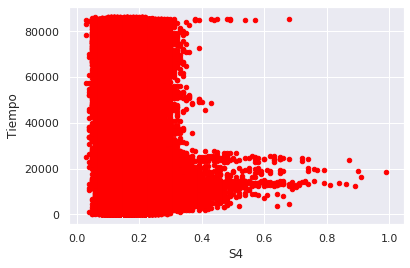

[0.21 0.12 0.16 ... 0.31 0.1  0.12]
[[ 5. 16.]
 [12. 43.]
 [27. 35.]
 ...
 [28. 14.]
 [15. 39.]
 [17. 35.]]


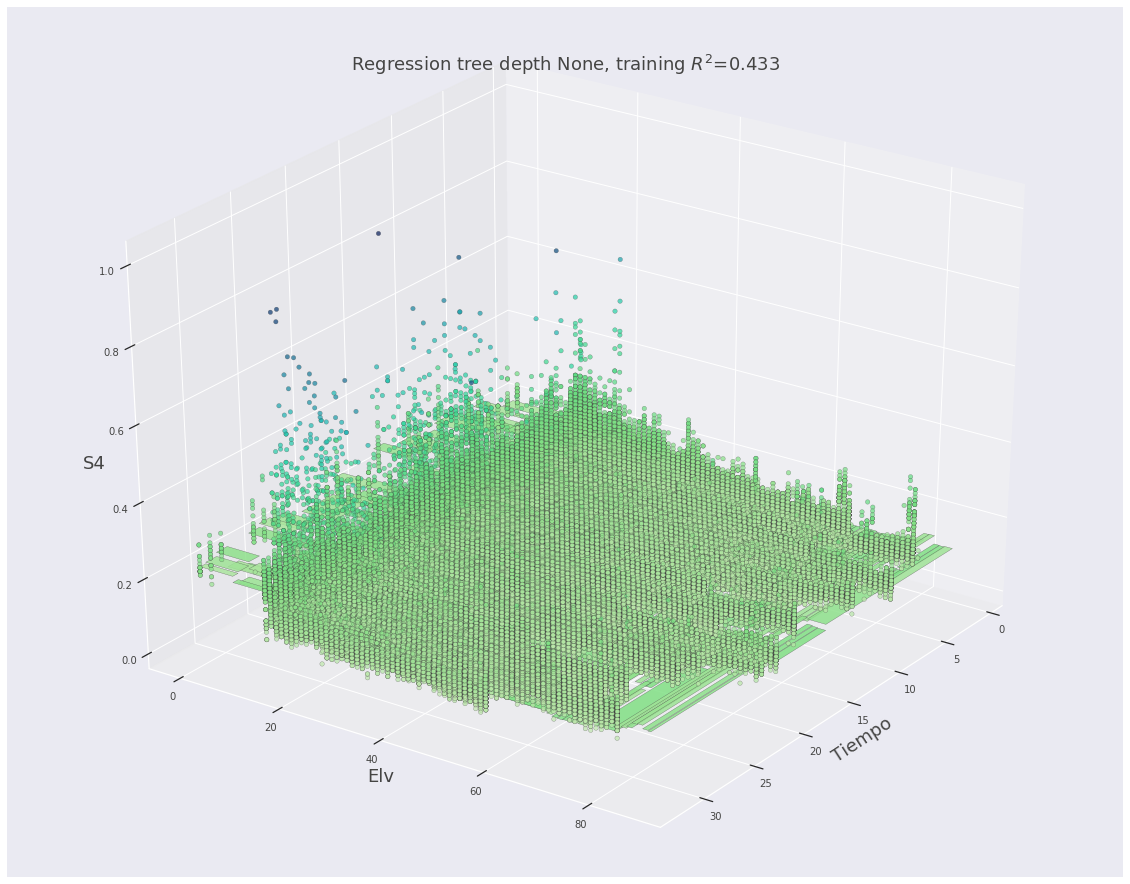

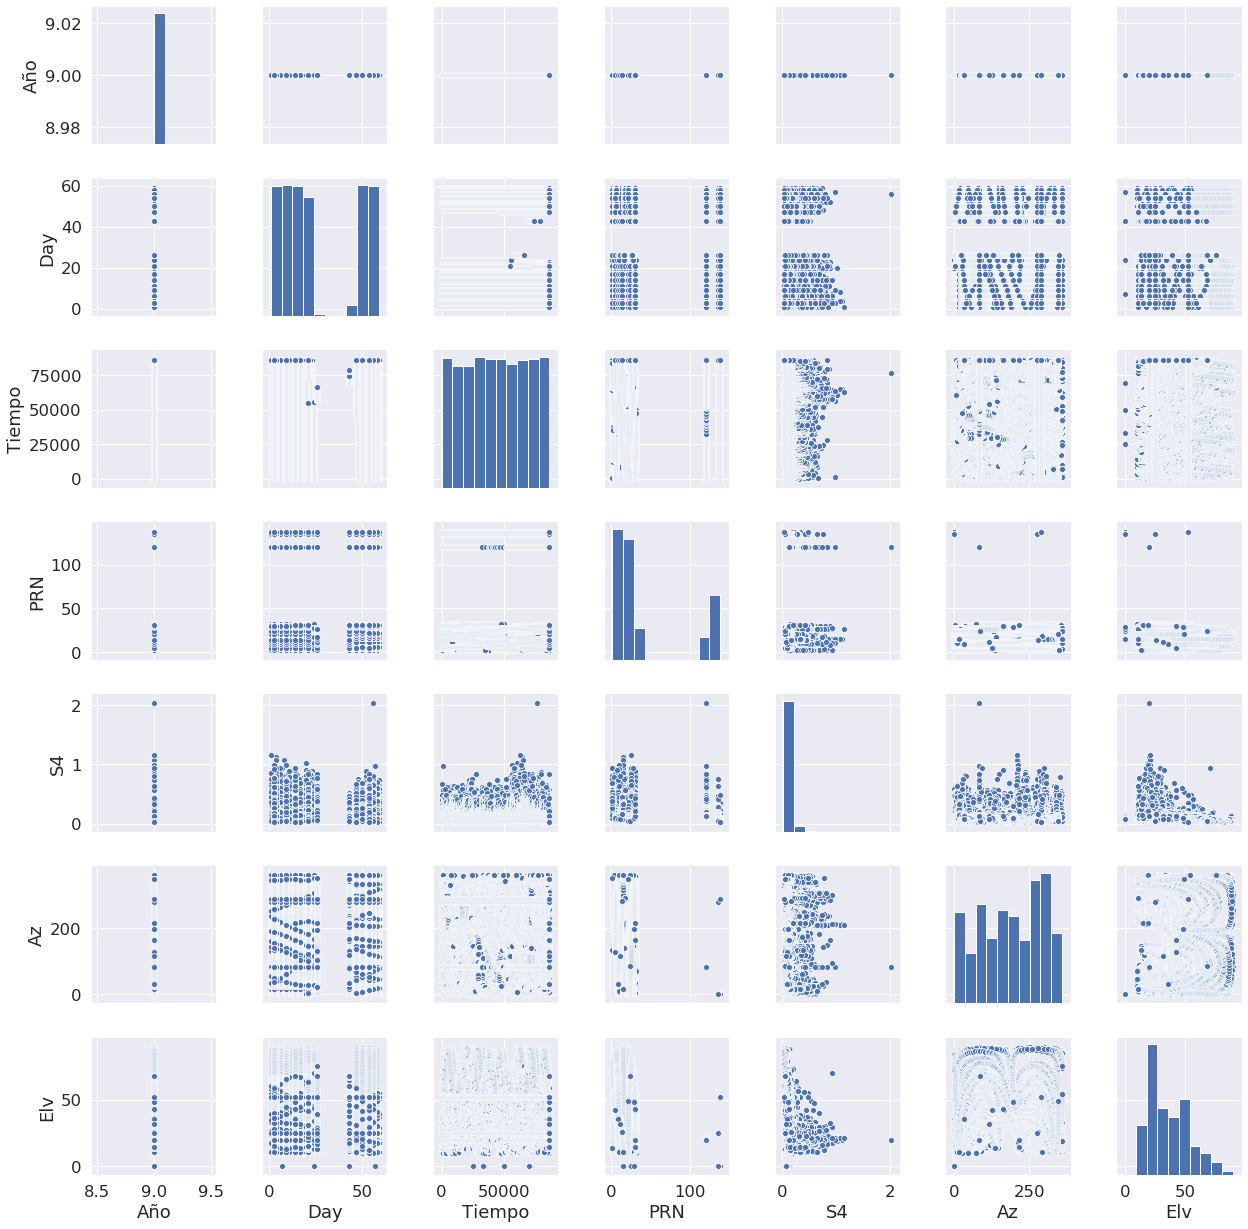

/home/gfajardo/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


/home/gfajardo/Desktop/Datos 121001/gfajardo_BZ3rhu/lji__090312.s4.gz
1
/home/gfajardo/Desktop/Datos 121001/gfajardo_BZ3rhu/lji__090430.s4.gz
2
/home/gfajardo/Desktop/Datos 121001/gfajardo_BZ3rhu/lji__090409.s4.gz
3
/home/gfajardo/Desktop/Datos 121001/gfajardo_BZ3rhu/lji__090404.s4.gz
4
/home/gfajardo/Desktop/Datos 121001/gfajardo_BZ3rhu/lji__090413.s4.gz
5
/home/gfajardo/Desktop/Datos 121001/gfajardo_BZ3rhu/lji__090326.s4.gz
6
/home/gfajardo/Desktop/Datos 121001/gfajardo_BZ3rhu/lji__090403.s4.gz
7
/home/gfajardo/Desktop/Datos 121001/gfajardo_BZ3rhu/lji__090415.s4.gz
8
/home/gfajardo/Desktop/Datos 121001/gfajardo_BZ3rhu/lji__090310.s4.gz
9
/home/gfajardo/Desktop/Datos 121001/gfajardo_BZ3rhu/lji__090412.s4.gz
10
/home/gfajardo/Desktop/Datos 121001/gfajardo_BZ3rhu/lji__090428.s4.gz
11
/home/gfajardo/Desktop/Datos 121001/gfajardo_BZ3rhu/lji__090330.s4.gz
12
/home/gfajardo/Desktop/Datos 121001/gfajardo_BZ3rhu/lji__090329.s4.gz
13
/home/gfajardo/Desktop/Datos 121001/gfajardo_BZ3rhu/lji__090

        Año    Day   Tiempo    PRN    S4     Az   Elv
3       9.0   71.0     33.0   16.0  0.06  212.3  58.8
4       9.0   71.0     33.0   18.0  0.06  117.6  50.2
6       9.0   71.0     33.0   22.0  0.03   51.8  69.1
10      9.0   71.0     33.0  138.0  0.04  289.3  52.2
14      9.0   71.0     93.0   16.0  0.05  212.6  59.2
15      9.0   71.0     93.0   18.0  0.06  118.3  49.9
17      9.0   71.0     93.0   22.0  0.03   53.0  69.4
21      9.0   71.0     93.0  138.0  0.04  289.3  52.2
25      9.0   71.0    153.0   16.0  0.06  213.0  59.7
26      9.0   71.0    153.0   18.0  0.05  118.9  49.6
28      9.0   71.0    153.0   22.0  0.03   54.3  69.6
32      9.0   71.0    153.0  138.0  0.03  289.3  52.2
36      9.0   71.0    213.0   16.0  0.06  213.4  60.2
37      9.0   71.0    213.0   18.0  0.06  119.6  49.4
39      9.0   71.0    213.0   22.0  0.03   55.7  69.9
42      9.0   71.0    213.0  138.0  0.03  289.3  52.2
46      9.0   71.0    273.0   16.0  0.07  213.8  60.7
47      9.0   71.0    273.0 

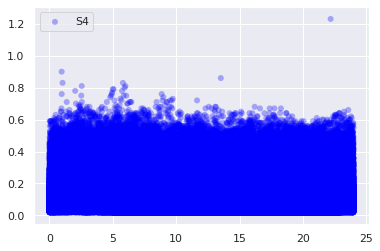

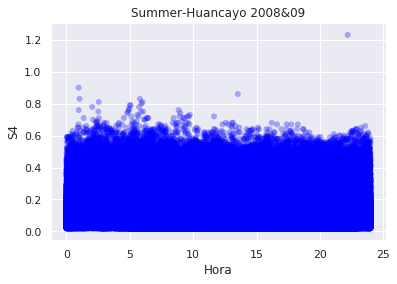

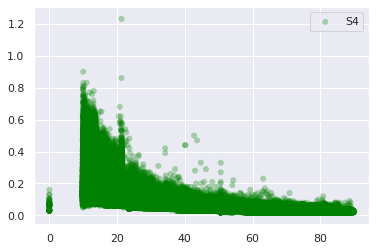

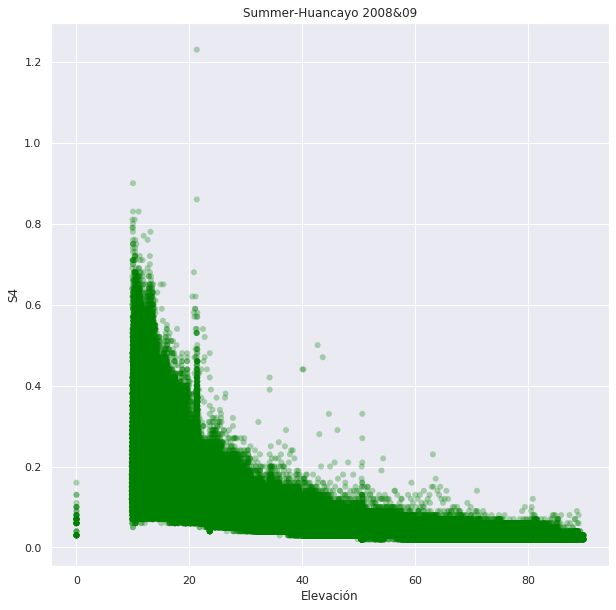

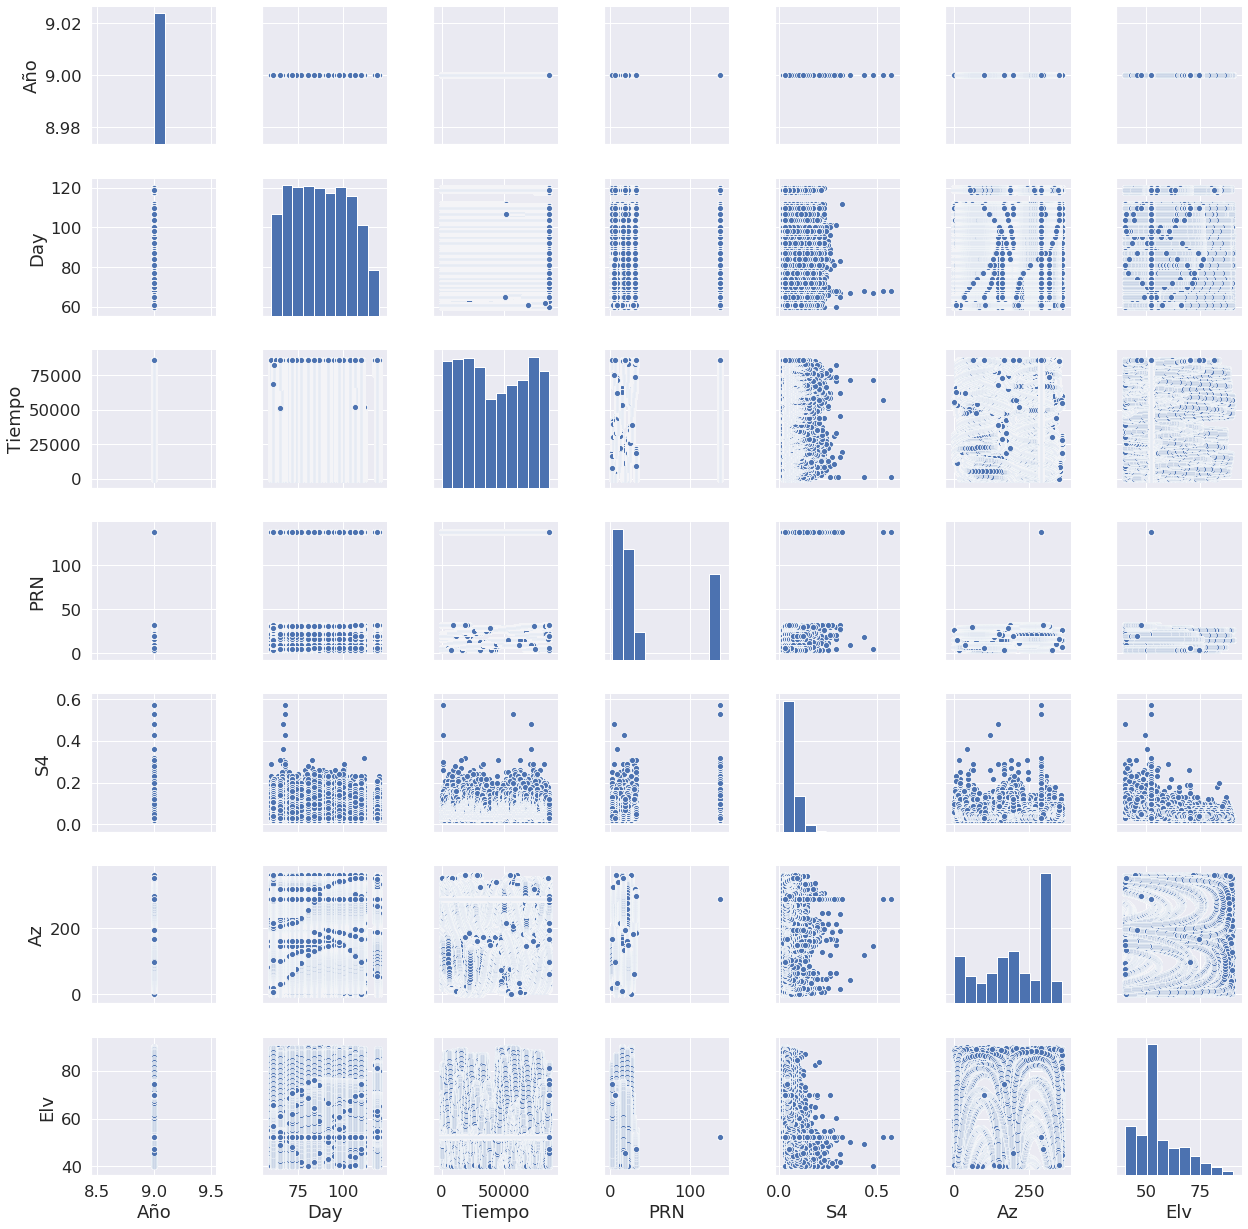

/home/gfajardo/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


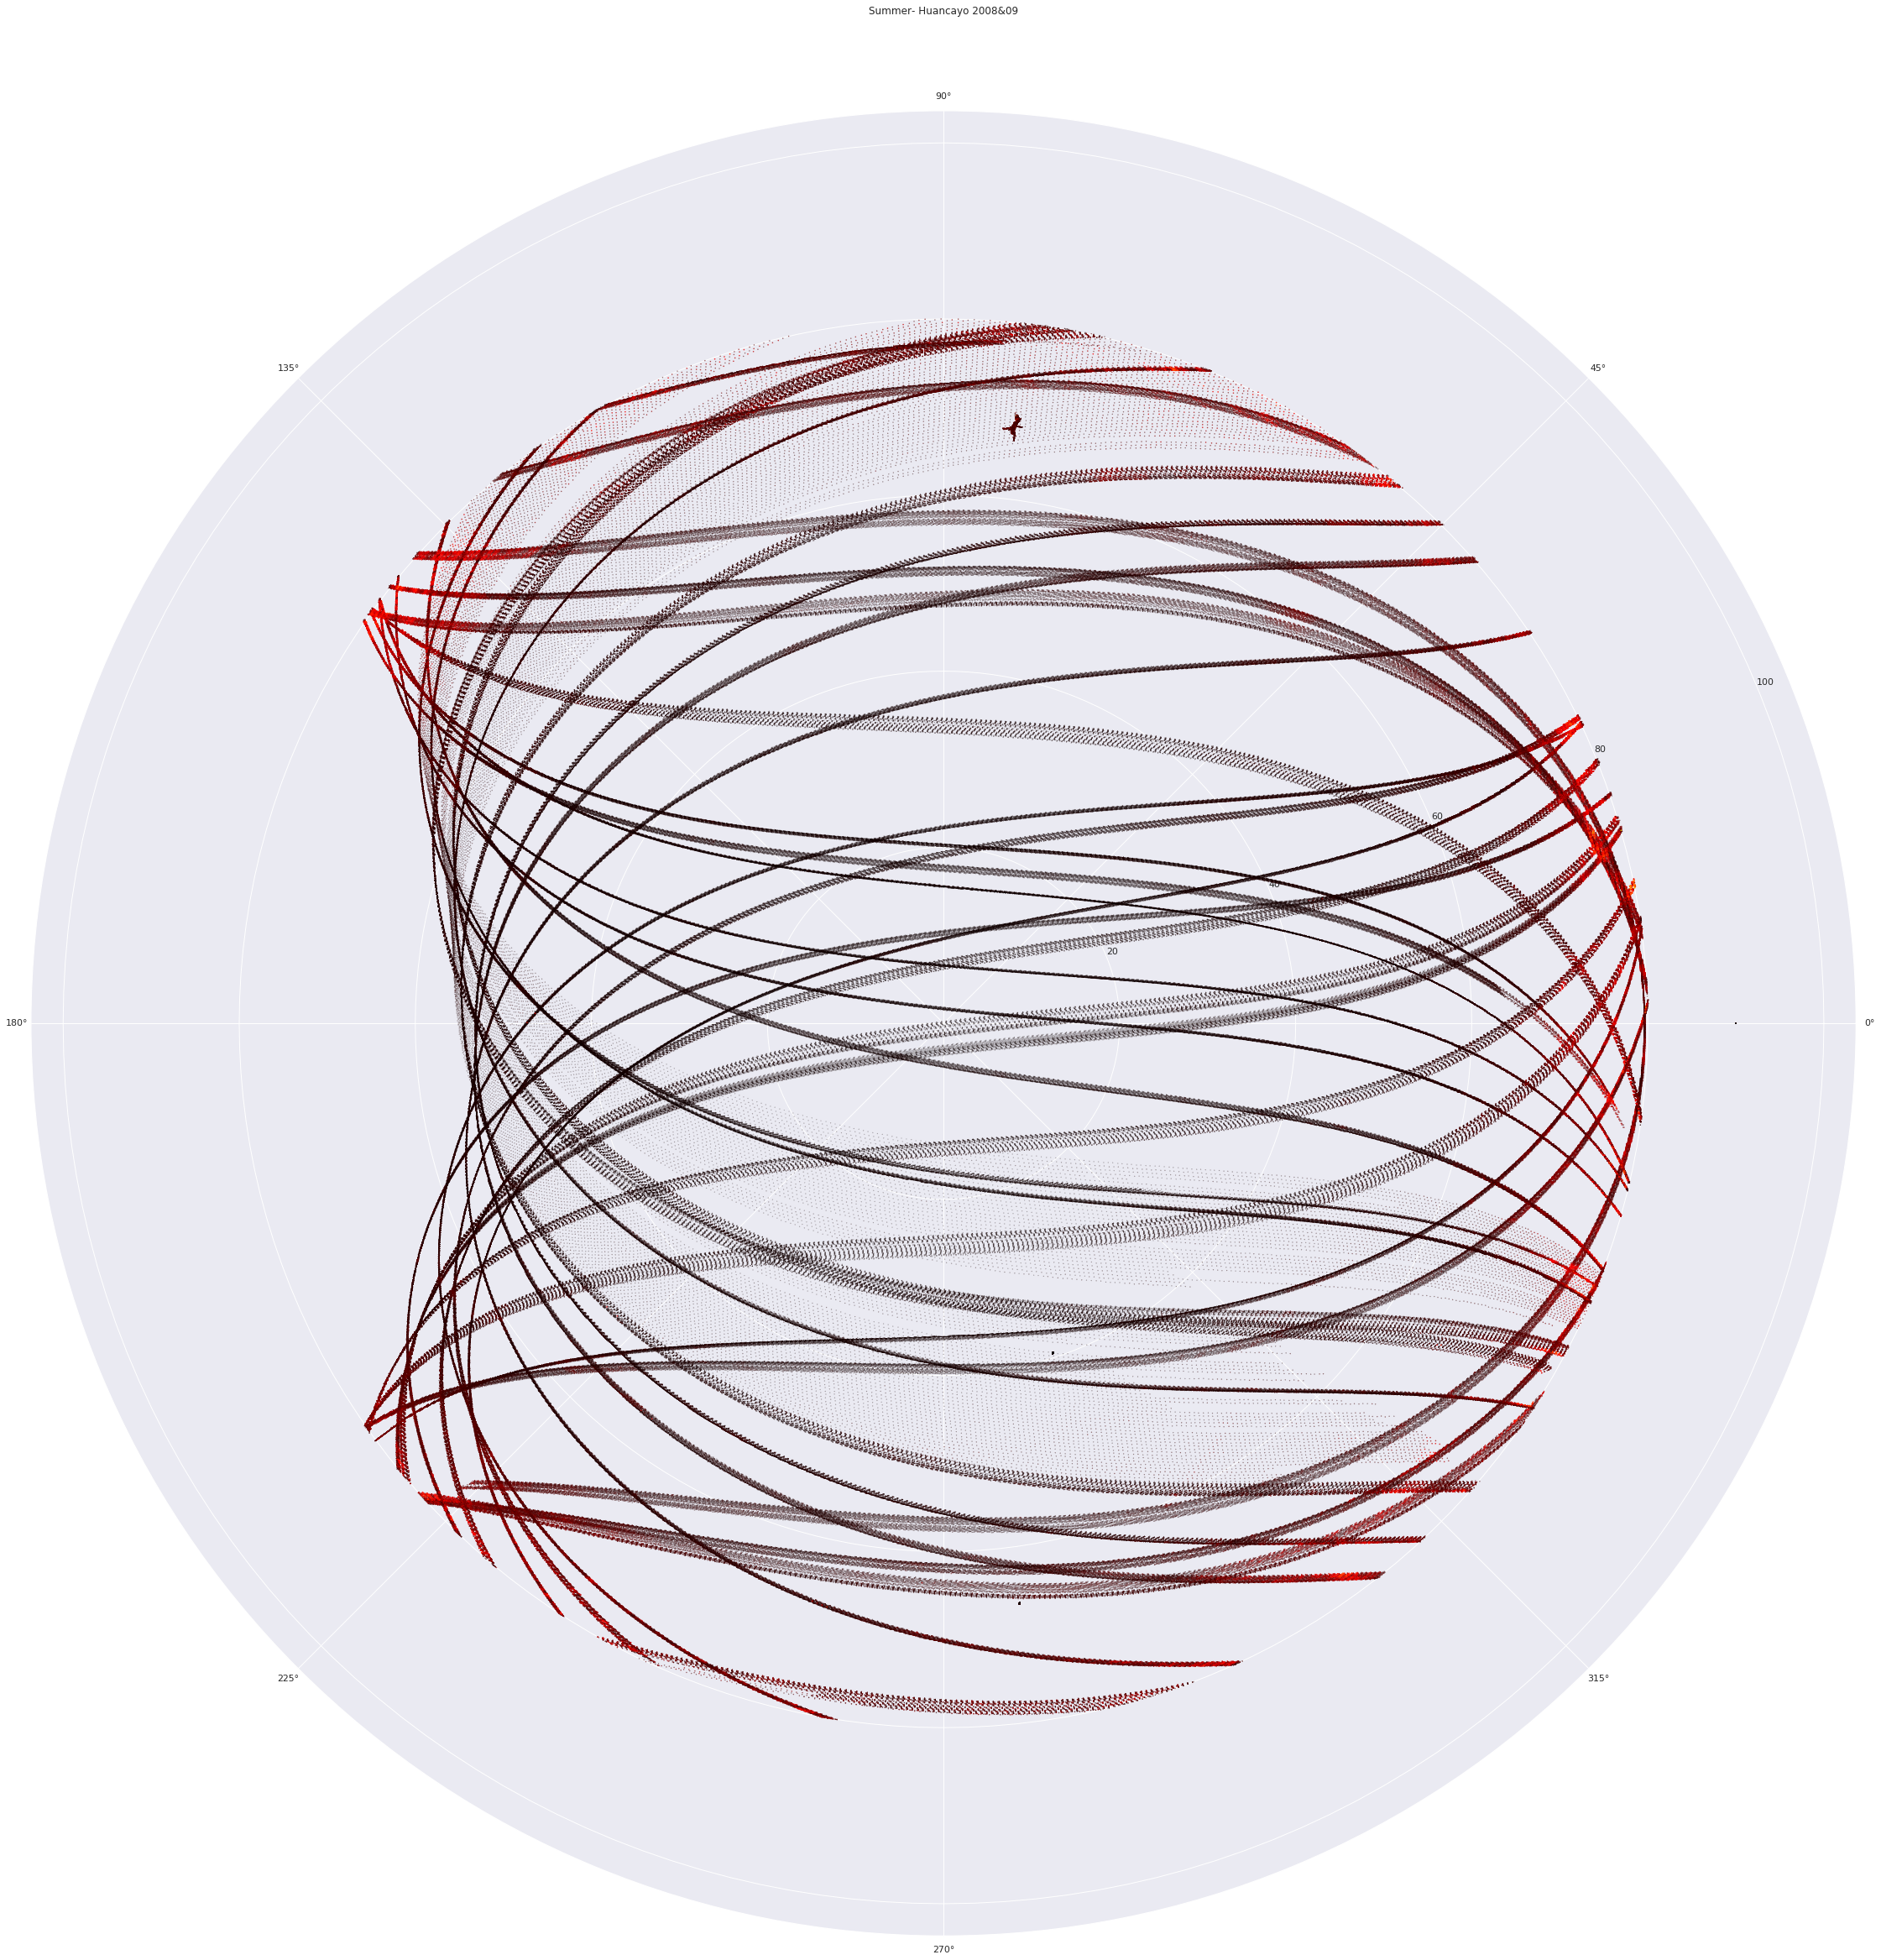

         Año    Day   Tiempo    PRN    S4     Az   Elv
0        8.0  348.0     52.0    2.0  0.06   93.5  33.1
1        8.0  348.0     52.0    5.0  0.05  202.5  35.1
2        8.0  348.0     52.0    9.0  0.03  145.9  61.5
3        8.0  348.0     52.0   12.0  0.05  185.9  36.1
4        8.0  348.0     52.0   15.0  0.06    6.1  33.3
5        8.0  348.0     52.0   24.0  0.10    3.3  24.4
6        8.0  348.0     52.0   26.0  0.23   17.1  17.6
7        8.0  348.0     52.0   29.0  0.05  307.2  48.0
8        8.0  348.0     52.0   30.0  0.08  229.8  26.8
9        8.0  348.0     52.0  135.0  0.05  277.4  23.6
10       8.0  348.0     52.0  138.0  0.03  288.4  50.6
11       8.0  348.0    112.0    2.0  0.06   94.1  33.1
12       8.0  348.0    112.0    5.0  0.05  202.0  35.2
13       8.0  348.0    112.0    9.0  0.04  145.0  61.8
14       8.0  348.0    112.0   12.0  0.05  185.4  36.1
15       8.0  348.0    112.0   15.0  0.07    6.2  32.8
16       8.0  348.0    112.0   24.0  0.10    3.6  24.8
17       8

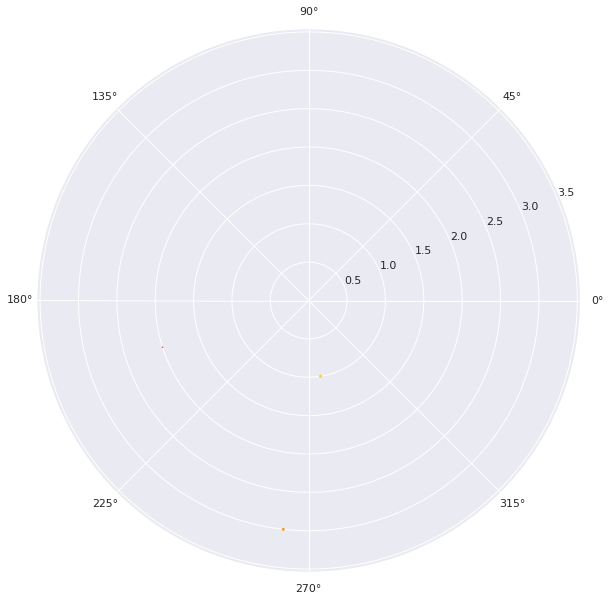

In [27]:
#GENERAR TABLA PARA VARIABLES DE CLIMA ESPACIAL CON SU RESPECTIVA ETIQUETA POR HORA
import os
import gzip
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
import datetime
import time

    
#data_file='/home/gfajardo/Downloads/omni2_QRxD0hVJTx.txt'
data_file='/home/gfajardo/Downloads/omni2_MEZZx4TuMb.lst'

column_names=['Año','Day','Tiempo','Vector_B','BX','BY','BZ','SW_Proton','SW_plasma','Kp_index','f10.7_index','AE-index']
    
Mli1= pd.read_csv(data_file,delim_whitespace=True,names=column_names)

Mli1['Año']=(Mli1['Año']-2000)*1.0
Mli1['Tiempo']=Mli1['Tiempo']

#Mli = Mli.drop(Mli.columns[[0]], axis=1)

Mli1['Ref'] = (Mli1['Año'].astype(int)).astype(str)+'/'+Mli1['Day'].astype(int).astype(str)+'/'+((Mli1['Tiempo']).astype(int)).astype(str)
Mli1=Mli1.drop(['Año'], axis=1)
Mli1=Mli1.drop(['Day'], axis=1)
Mli1=Mli1.drop(['Tiempo'], axis=1)
#Mli2=Mli1[(Mli1.Año == 8.0)&(Mli1.Day == 357)&(0<Mli1.Tiempo)&(Mli1.Tiempo<=1)]
#print(Mli2['f10.7_index'].values)
print(Mli1)

      Vector_B   BX   BY   BZ  SW_Proton  SW_plasma  Kp_index  f10.7_index  \
0          2.2 -0.2 -2.2  0.3        3.6      355.0         0         66.2   
1          2.5 -1.1 -2.2  0.8        3.4      355.0         0         66.2   
2          2.8 -0.2 -2.7  0.6        3.2      347.0         0         66.2   
3          2.7  1.7 -2.0  0.4        2.8      333.0         0         66.2   
4          2.6  2.6 -0.1  0.4        2.9      328.0         0         66.2   
5          2.7  2.3  1.4  0.3        2.7      324.0         0         66.2   
6          3.0  2.7  0.0  1.2        2.3      318.0         0         66.2   
7          3.0  2.8 -0.5  0.9        2.8      316.0         0         66.2   
8          2.9  2.6 -1.3  0.5        2.9      317.0         0         66.2   
9          2.9  2.4 -1.6  0.3        2.9      316.0         0         66.2   
10         2.7  2.1 -1.7 -0.2        2.7      314.0         0         66.2   
11         2.7  2.0 -1.8 -0.2        2.9      313.0         0   

In [28]:
#GENERAR TABLA S4 CON SU RESPECTIVA ETIQUETA POR HORA

import os
import gzip
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
import datetime
import time
data_file='/home/gfajardo/Desktop/Datos 121001/Summer-08&09 Huancayo.csv'
column_names=['Año','Day','Tiempo','PRN','S4','Az','Elv']
Mli = pd.read_csv(data_file)#,names=column_names, header=2)
Mli = Mli.drop(Mli.columns[[0]], axis=1)
#Mli['Kp_index'] = (Mli['Año']).astype(int)
#Mli['f10.7_index'] = (Mli['Año']).astype(int)
Mli['Ref'] = (Mli['Año'].astype(int)).astype(str)+'/'+Mli['Day'].astype(int).astype(str)+'/'+((Mli['Tiempo']/3600).astype(int)).astype(str)
print(Mli)


         Año    Day   Tiempo    PRN    S4     Az   Elv       Ref
0        8.0  348.0     52.0    2.0  0.06   93.5  33.1   8/348/0
1        8.0  348.0     52.0    5.0  0.05  202.5  35.1   8/348/0
2        8.0  348.0     52.0    9.0  0.03  145.9  61.5   8/348/0
3        8.0  348.0     52.0   12.0  0.05  185.9  36.1   8/348/0
4        8.0  348.0     52.0   15.0  0.06    6.1  33.3   8/348/0
5        8.0  348.0     52.0   24.0  0.10    3.3  24.4   8/348/0
6        8.0  348.0     52.0   26.0  0.23   17.1  17.6   8/348/0
7        8.0  348.0     52.0   29.0  0.05  307.2  48.0   8/348/0
8        8.0  348.0     52.0   30.0  0.08  229.8  26.8   8/348/0
9        8.0  348.0     52.0  135.0  0.05  277.4  23.6   8/348/0
10       8.0  348.0     52.0  138.0  0.03  288.4  50.6   8/348/0
11       8.0  348.0    112.0    2.0  0.06   94.1  33.1   8/348/0
12       8.0  348.0    112.0    5.0  0.05  202.0  35.2   8/348/0
13       8.0  348.0    112.0    9.0  0.04  145.0  61.8   8/348/0
14       8.0  348.0    11

TypeError: string indices must be integers

KeyboardInterrupt: 

    Año    Day  Tiempo    PRN    S4     Az   Elv  Kp_index  f10.7_index
1   8.0  348.0    52.0    5.0  0.05  202.5  35.1         8            8
2   8.0  348.0    52.0    9.0  0.03  145.9  61.5         8            8
3   8.0  348.0    52.0   12.0  0.05  185.9  36.1         8            8
4   8.0  348.0    52.0   15.0  0.06    6.1  33.3         8            8
5   8.0  348.0    52.0   24.0  0.10    3.3  24.4         8            8
6   8.0  348.0    52.0   26.0  0.23   17.1  17.6         8            8
7   8.0  348.0    52.0   29.0  0.05  307.2  48.0         8            8
8   8.0  348.0    52.0   30.0  0.08  229.8  26.8         8            8
9   8.0  348.0    52.0  135.0  0.05  277.4  23.6         8            8
10  8.0  348.0    52.0  138.0  0.03  288.4  50.6         8            8
11  8.0  348.0   112.0    2.0  0.06   94.1  33.1         8            8
12  8.0  348.0   112.0    5.0  0.05  202.0  35.2         8            8
13  8.0  348.0   112.0    9.0  0.04  145.0  61.8         8      

AttributeError: 'numpy.float64' object has no attribute 'replace'

         Año  Day_x  Tiempo_x    PRN    S4     Az   Elv  Day_y  Tiempo_y  \
0        8.0  348.0      52.0    2.0  0.06   93.5  33.1  357.0       1.0   
1        8.0  348.0      52.0    5.0  0.05  202.5  35.1  357.0       1.0   
2        8.0  348.0      52.0    9.0  0.03  145.9  61.5  357.0       1.0   
3        8.0  348.0      52.0   12.0  0.05  185.9  36.1  357.0       1.0   
4        8.0  348.0      52.0   15.0  0.06    6.1  33.3  357.0       1.0   
5        8.0  348.0      52.0   24.0  0.10    3.3  24.4  357.0       1.0   
6        8.0  348.0      52.0   26.0  0.23   17.1  17.6  357.0       1.0   
7        8.0  348.0      52.0   29.0  0.05  307.2  48.0  357.0       1.0   
8        8.0  348.0      52.0   30.0  0.08  229.8  26.8  357.0       1.0   
9        8.0  348.0      52.0  135.0  0.05  277.4  23.6  357.0       1.0   
10       8.0  348.0      52.0  138.0  0.03  288.4  50.6  357.0       1.0   
11       8.0  348.0     112.0    2.0  0.06   94.1  33.1  357.0       1.0   
12       8.0

    Año    Day  Tiempo    PRN    S4     Az   Elv  Kp_index  f10.7_index
1   8.0  348.0    52.0    5.0  0.05  202.5  35.1         4            8
2   8.0  348.0    52.0    9.0  0.03  145.9  61.5         4            8
3   8.0  348.0    52.0   12.0  0.05  185.9  36.1         4            8
4   8.0  348.0    52.0   15.0  0.06    6.1  33.3         4            8
5   8.0  348.0    52.0   24.0  0.10    3.3  24.4         4            8
6   8.0  348.0    52.0   26.0  0.23   17.1  17.6         4            8
7   8.0  348.0    52.0   29.0  0.05  307.2  48.0         4            8
8   8.0  348.0    52.0   30.0  0.08  229.8  26.8         4            8
9   8.0  348.0    52.0  135.0  0.05  277.4  23.6         4            8
10  8.0  348.0    52.0  138.0  0.03  288.4  50.6         4            8
11  8.0  348.0   112.0    2.0  0.06   94.1  33.1         4            8
12  8.0  348.0   112.0    5.0  0.05  202.0  35.2         4            8
13  8.0  348.0   112.0    9.0  0.04  145.0  61.8         4      

/home/gfajardo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
#UNIR TABLAS EN BASE A LA ETIQUETA DE REFERENCIA (Ref)
merged_left = pd.merge(left=Mli,right=Mli1, how='left', left_on='Ref', right_on='Ref')
merged_left = merged_left.drop(['Ref'], axis=1) #Eliminar la columna de Referencia (Ref.)
#print(merged_left.size)
merged_left1 = merged_left[np.isfinite(merged_left['Kp_index'])] #Tomar solo los valores finitos(Es decir no tomar NaN)
print(merged_left1)
#print(merged_left[merged_left['Kp_index'].isnull()]) #ver que columnas contienen Nan
merged_left1.to_csv(r'/home/gfajardo/Desktop/Datos 121001/Summer-08&09 Huancayo-COMPLETO.csv')

         Año    Day   Tiempo    PRN    S4     Az   Elv  Vector_B   BX   BY  \
0        8.0  348.0     52.0    2.0  0.06   93.5  33.1       5.1  4.5  0.4   
1        8.0  348.0     52.0    5.0  0.05  202.5  35.1       5.1  4.5  0.4   
2        8.0  348.0     52.0    9.0  0.03  145.9  61.5       5.1  4.5  0.4   
3        8.0  348.0     52.0   12.0  0.05  185.9  36.1       5.1  4.5  0.4   
4        8.0  348.0     52.0   15.0  0.06    6.1  33.3       5.1  4.5  0.4   
5        8.0  348.0     52.0   24.0  0.10    3.3  24.4       5.1  4.5  0.4   
6        8.0  348.0     52.0   26.0  0.23   17.1  17.6       5.1  4.5  0.4   
7        8.0  348.0     52.0   29.0  0.05  307.2  48.0       5.1  4.5  0.4   
8        8.0  348.0     52.0   30.0  0.08  229.8  26.8       5.1  4.5  0.4   
9        8.0  348.0     52.0  135.0  0.05  277.4  23.6       5.1  4.5  0.4   
10       8.0  348.0     52.0  138.0  0.03  288.4  50.6       5.1  4.5  0.4   
11       8.0  348.0    112.0    2.0  0.06   94.1  33.1       5.1

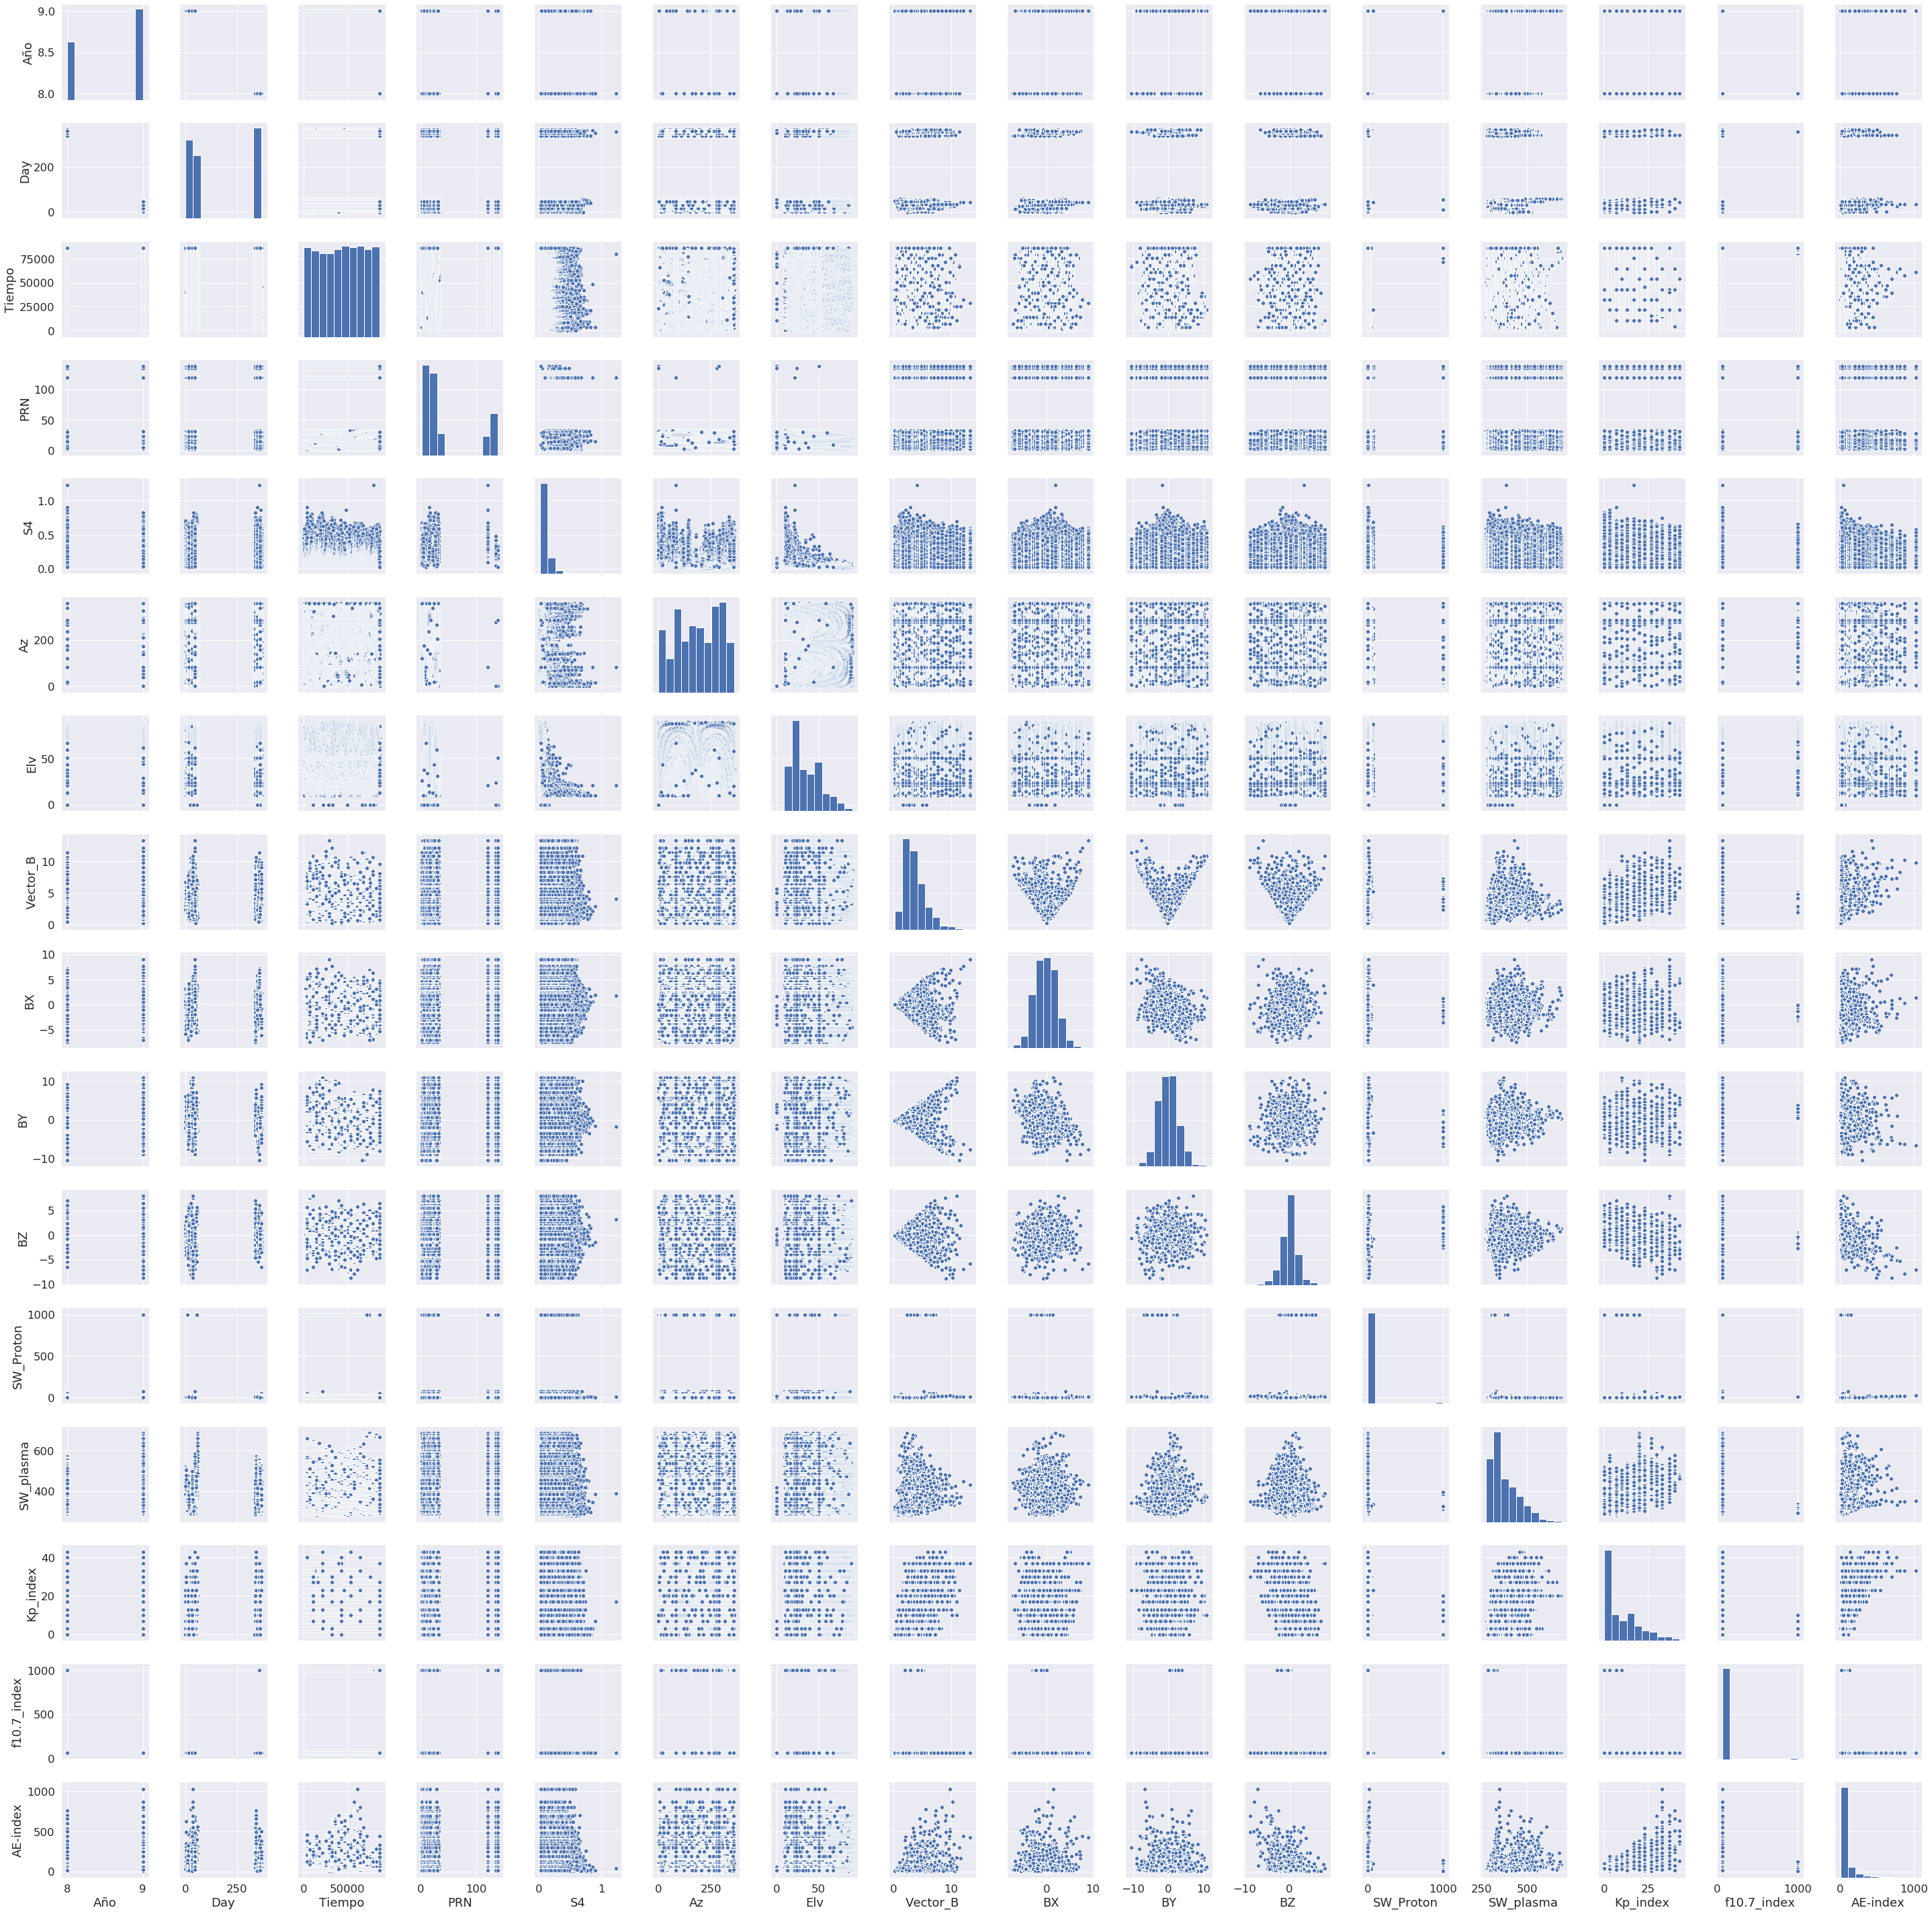

/home/gfajardo/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:969: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/gfajardo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]
[[5.1 4.5]
 [5.1 4.5]
 [5.1 4.5]
 ...
 [2.7 1.8]
 [2.7 1.8]
 [2.7 1.8]]


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


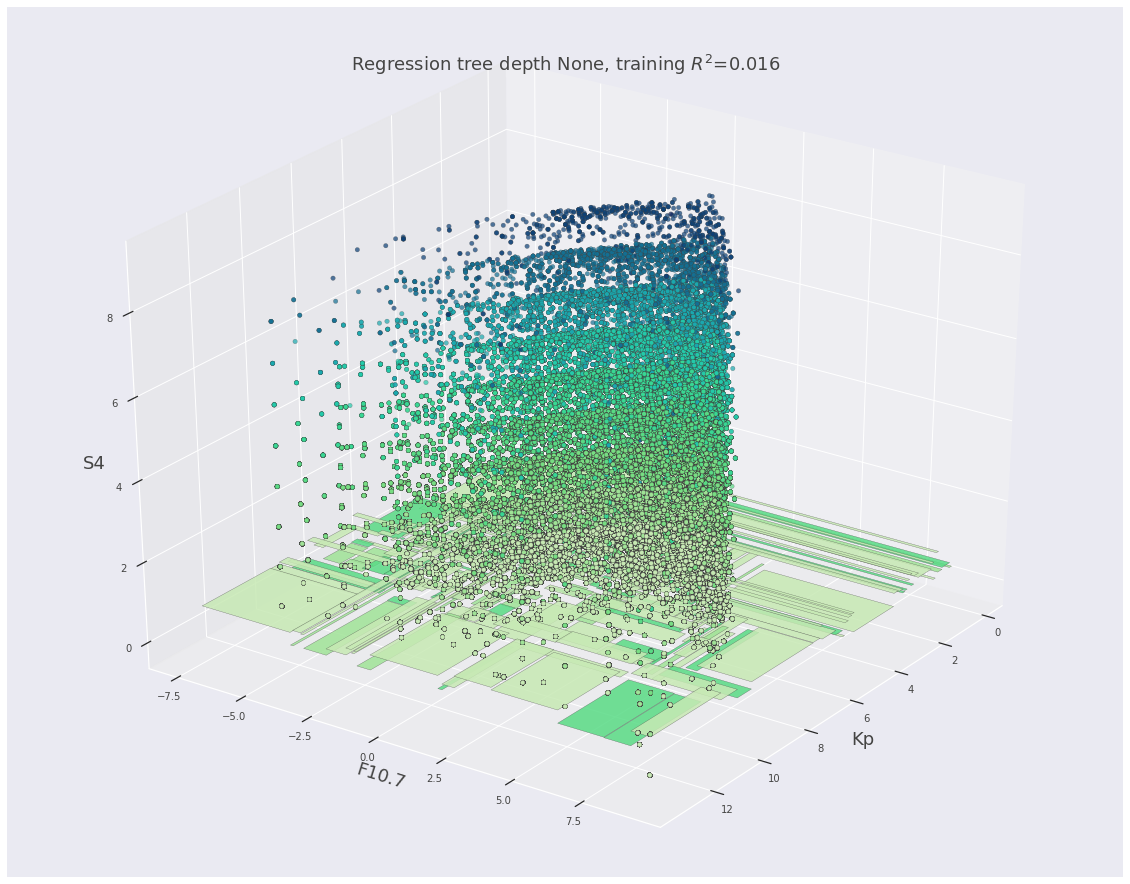

In [90]:
merged_left.to_csv(r'/home/gfajardo/Desktop/Datos 121001/Summer-08&09 Huancayo-merge.csv')

In [2]:
#GENERAR TABLA PARA VARIABLES DE CLIMA ESPACIAL CON SU RESPECTIVA ETIQUETA POR HORA COMPLETA
import os
import gzip
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
import datetime
import time

data_file='/home/gfajardo/Desktop/Datos 121001/Summer-08&09 Huancayo-COMPLETO.csv'
column_names=['Año','Day','Tiempo','PRN','S4','Az','Elv','Vector_B','BX','BY','BZ','SW_Proton','SW_plasma','Kp_index','f10.7_index','AE-index']
Mli3 = pd.read_csv(data_file)#,names=column_names, header=2)
Mli3 = Mli3.drop(Mli3.columns[[0]], axis=1)
#Mli['Kp_index'] = (Mli['Año']).astype(int)
#Mli['f10.7_index'] = (Mli['Año']).astype(int)
print(Mli3)


         Año    Day   Tiempo    PRN    S4     Az   Elv  Vector_B   BX   BY  \
0        8.0  348.0     52.0    2.0  0.06   93.5  33.1       5.1  4.5  0.4   
1        8.0  348.0     52.0    5.0  0.05  202.5  35.1       5.1  4.5  0.4   
2        8.0  348.0     52.0    9.0  0.03  145.9  61.5       5.1  4.5  0.4   
3        8.0  348.0     52.0   12.0  0.05  185.9  36.1       5.1  4.5  0.4   
4        8.0  348.0     52.0   15.0  0.06    6.1  33.3       5.1  4.5  0.4   
5        8.0  348.0     52.0   24.0  0.10    3.3  24.4       5.1  4.5  0.4   
6        8.0  348.0     52.0   26.0  0.23   17.1  17.6       5.1  4.5  0.4   
7        8.0  348.0     52.0   29.0  0.05  307.2  48.0       5.1  4.5  0.4   
8        8.0  348.0     52.0   30.0  0.08  229.8  26.8       5.1  4.5  0.4   
9        8.0  348.0     52.0  135.0  0.05  277.4  23.6       5.1  4.5  0.4   
10       8.0  348.0     52.0  138.0  0.03  288.4  50.6       5.1  4.5  0.4   
11       8.0  348.0    112.0    2.0  0.06   94.1  33.1       5.1

In [1]:
import sys
sys.version

'3.7.3 (default, Mar 27 2019, 22:11:17) \n[GCC 7.3.0]'

In [3]:
data_file='/home/gfajardo/Desktop/Datos 121001/2008-12-31.csv'
column_names=['A','B','C','D']
Pos= pd.read_csv(data_file)#,names=column_names, header=2)
Pos = Pos.drop(Pos.columns[[0]], axis=1)
#Mli['Kp_index'] = (Mli['Año']).astype(int)
#Mli['f10.7_index'] = (Mli['Año']).astype(int)
print(Pos)

              A          B            C                              D
0    -12.045794 -75.322935  3211.357835  2008-12-31 00:00:00.000000UTC
1    -12.045795 -75.322930  3209.615091  2008-12-31 00:00:10.000000UTC
2    -12.045796 -75.322925  3207.833919  2008-12-31 00:00:20.000000UTC
3    -12.045797 -75.322920  3205.962137  2008-12-31 00:00:30.000000UTC
4    -12.045798 -75.322915  3204.024771  2008-12-31 00:00:40.000000UTC
5    -12.045798 -75.322909  3201.933429  2008-12-31 00:00:50.000000UTC
6    -12.045799 -75.322904  3199.873260  2008-12-31 00:01:00.000000UTC
7    -12.045799 -75.322899  3197.982123  2008-12-31 00:01:10.000000UTC
8    -12.045800 -75.322894  3196.128821  2008-12-31 00:01:20.000000UTC
9    -12.045801 -75.322889  3194.293515  2008-12-31 00:01:30.000000UTC
10   -12.045801 -75.322885  3192.419681  2008-12-31 00:01:40.000000UTC
11   -12.045802 -75.322881  3190.485542  2008-12-31 00:01:50.000000UTC
12   -12.045802 -75.322877  3188.545927  2008-12-31 00:02:00.000000UTC
13   -